## LDA Topic Modeling 
    - TEST DOC

In [13]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

from Preprocess import load
from Preprocess.text_preprocess import Preprocess
from Model.evaluate import get_best_topics, lda_visualize
from Model.model import LDAModeling

## Data Load
- Preprocess/text_preprocess.py의 Preprocess클래스에 객체를 할당할 때, 해당 파일의 경로를 설정하여 주면, get_cleaned 라는 __init__ 함수를 통해 전처리가 모두 완료된 texts를 생성하여 줍니디.
- 이후, 클래스의 get_lda_inputs 함수를 사용하여 LDA 모델에 필요한 texts, dictionary, corpus를 생성합니다.

In [2]:
processor = Preprocess("./Data/transcripts.csv")

[Kss]: Oh! You have konlpy.tag.Mecab in your environment. Kss will take this as a backend! :D



  0%|          | 0/302 [00:00<?, ?it/s]

In [3]:
texts, dictionary, corpus = processor.get_lda_inputs()

In [4]:
[i for i in dictionary.items()]

[(0, '10'),
 (1, '1000'),
 (2, '102'),
 (3, '12'),
 (4, '15'),
 (5, '18'),
 (6, '25'),
 (7, 'ab'),
 (8, 'ad'),
 (9, 'ap'),
 (10, 'ax'),
 (11, 'bd'),
 (12, 'bx'),
 (13, 'ex'),
 (14, 'gx'),
 (15, 'ix'),
 (16, 'ox'),
 (17, 'pa'),
 (18, 'psy'),
 (19, 'px'),
 (20, 'xy'),
 (21, 'yg'),
 (22, 'yu'),
 (23, '가능'),
 (24, '가정'),
 (25, '각각'),
 (26, '개수'),
 (27, '거랑'),
 (28, '결과'),
 (29, '경우'),
 (30, '계산'),
 (31, '계수'),
 (32, '고려'),
 (33, '고백'),
 (34, '고부'),
 (35, '고삐'),
 (36, '고영희'),
 (37, '고요'),
 (38, '곤란'),
 (39, '곱셈'),
 (40, '공식'),
 (41, '공통'),
 (42, '과육'),
 (43, '과정'),
 (44, '관련'),
 (45, '괄호'),
 (46, '교환'),
 (47, '구두'),
 (48, '구매'),
 (49, '그거'),
 (50, '그것'),
 (51, '그때'),
 (52, '그림'),
 (53, '기본'),
 (54, '기억'),
 (55, '나라'),
 (56, '누구'),
 (57, '다낭'),
 (58, '다음'),
 (59, '다항식'),
 (60, '당시'),
 (61, '대답'),
 (62, '덧셈'),
 (63, '뒤쪽'),
 (64, '라저'),
 (65, '로고'),
 (66, '로또'),
 (67, '로만'),
 (68, '마이너'),
 (69, '마이너스'),
 (70, '마인'),
 (71, '마지막'),
 (72, '마찬가지'),
 (73, '말씀'),
 (74, '모피'),
 (75, '문자'),
 (76, '문제'

## Model
- Model/model.py의 LDAModeling 클래스로 texts, dictionary, corpus를 받는 객체를 생성합니다.
- compute_evaluation_index 함수로 model_list, coherence_values, perplexity_values를 생성합니다
- plot_optimal_number_of_topics()를 통해 coherence value와 perplexity value의 plot을 나타냅니다
- Model/evaluate.py의 get_best_topics를 활용해 최상

In [5]:
LDAmodel = LDAModeling(
    texts=texts,
    dictionary=dictionary,
    corpus=corpus,
    limit=15
)

In [6]:
model_list, coherence_values, perplexity_values = LDAmodel.compute_evaluation_index()

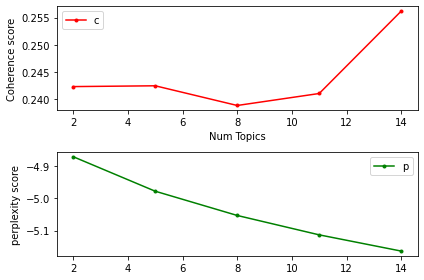

In [7]:
LDAmodel.plot_optimal_number_of_topics()

In [8]:
sent_topics_df = get_best_topics(
    corpus=corpus,
    texts=texts,
    model_list=model_list,
    coherence_values=coherence_values,
    perplexity_values=perplexity_values,
    mode="coherence"
)

In [9]:
sent_topics_df

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Original_Texts
0,9,0.9989,"인수, 여기, 다음, 플러스, 분해, 우리, 표현, 공식, 수분, 제곱","[이번, 시간, 인수, 분해, 수분, 우리, 곱셈, 공식, 밀접, 관련, 곱셈, 공..."


In [10]:
model = model_list[np.argmax(coherence_values)]
model.show_topic(9)

[('인수', 0.063024394),
 ('여기', 0.050901476),
 ('다음', 0.04003815),
 ('플러스', 0.040033028),
 ('분해', 0.03518828),
 ('우리', 0.032769635),
 ('표현', 0.02913415),
 ('공식', 0.027934024),
 ('수분', 0.026703335),
 ('제곱', 0.02428598)]

In [11]:
load.save_processed_data(texts, "test.csv")

In [12]:
load.save_corpus(corpus, "test_corpus.csv")

In [14]:
lda_visualize(model, corpus, dictionary)